# Research questions:
---
Shark related attacks according to sex.
- Shark related attacks according to sex, throughout history

Shark related deaths according to sex.
- Shark related deaths according to sex, throughout history

PIRATE KIDS:
- Shark related infant deaths according to sex throughout history
---
**Bonus question:**
- Morning bird-shark: What is a shark's favourite meal?
---

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import re

## Subset with variables of interest

In [2]:
attacks = pd.read_csv("../data/attacks.csv", encoding = "unicode_escape")
df = attacks[["Year", "Sex ", "Fatal (Y/N)", "Age", "Time"]]

In [3]:
df.duplicated().sum()

20940

In [4]:
df.drop_duplicates(inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape # 4783 unique subjects

(4783, 5)

In [7]:
df.isna().sum()

Year              3
Sex             377
Fatal (Y/N)     460
Age            1397
Time           1885
dtype: int64

### Cleaning of "Year" (only 3 NaN)

In [8]:
df["Year"].describe()

count    4780.000000
mean     1961.906276
std       151.480634
min         0.000000
25%      1955.750000
50%      1988.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

In [9]:
df["Year"][df["Year"] == df["Year"].min()].index # 23 subjects with Year 0 (plus 3 na)

Index([6177, 6181, 6184, 6185, 6189, 6193, 6198, 6200, 6202, 6226, 6228, 6232,
       6238, 6239, 6241, 6242, 6243, 6254, 6259, 6265, 6276, 6277, 6301],
      dtype='int64')

In [10]:
#df[df["Year"] == 0] = float('nan') - > Problematic later. Better to use loc method. float('nan') better than None, to homogeneise
df.loc[df["Year"][df["Year"] == 0].index, "Year"] = float('nan')

In [11]:
df["Year"].describe()

count    4757.000000
mean     1971.392054
std        65.979031
min         5.000000
25%      1956.000000
50%      1988.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

In [12]:
df.sort_values(by = "Year").head()

,Year,Sex,Fatal (Y/N),Age,Time
6176,5.0,M,N,NaN,NaN
6175,77.0,M,Y,NaN,NaN
6174,500.0,M,N,NaN,NaN
6173,1543.0,M,Y,NaN,NaN
6172,1554.0,M,UNKNOWN,NaN,NaN


In [13]:
df.loc[df["Year"][(df["Year"] == 5) | (df["Year"] == 77) | (df["Year"] == 500)].index, "Year"] = float('nan')

In [14]:
df.shape # 4783 unique subjects

(4783, 5)

In [15]:
sns.set(rc={"figure.figsize": (5, 4)})
sns.set_style("whitegrid")

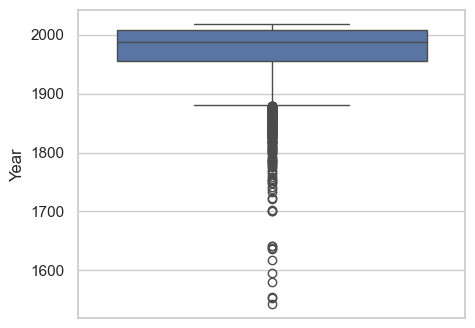

In [16]:
sns.boxplot(y = "Year", data = df); # There is not much information about shark attacks previous to 1880

### Cleaning of "Sex" (377 NaN)

In [17]:
df.rename({"Sex ":"Sex"}, axis = 1, inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3981233909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({"Sex ":"Sex"}, axis = 1, inplace = True)


In [18]:
df["Sex"].describe() # 6 different categories

count     4406
unique       6
top          M
freq      3801
Name: Sex, dtype: object

In [19]:
df["Sex"].value_counts()

Sex
M      3801
F       599
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [20]:
df[(df["Sex"] == "M ") | (df["Sex"] == "N") | (df["Sex"] == "lli") | (df["Sex"] == ".")]

,Year,Sex,Fatal (Y/N),Age,Time
563,2014.0,M,N,42,15h30
1587,2005.0,M,N,NaN,NaN
1624,2004.0,lli,N,38,13h30
4938,1934.0,N,N,NaN,NaN
5437,1908.0,.,Y,NaN,NaN
6131,1801.0,N,Y,NaN,NaN


In [21]:
df.loc[df["Sex"][df["Sex"] == "M "].index, "Sex"] = "M"
df.loc[df["Sex"][(df["Sex"] == "N") | (df["Sex"] == "lli") | (df["Sex"] == ".")].index, "Sex"] = float('nan')

In [22]:
df["Sex"].value_counts()

Sex
M    3803
F     599
Name: count, dtype: int64

In [23]:
df["Sex"].isna().sum() # 381 subjects with unknown sex of a total of 4783. More than half the amount of "F".
                           # Not imputable.

381

### Cleaning of "Fatal (Y/N)" (460 NaN)

In [24]:
df.rename({"Fatal (Y/N)":"Fatal"}, axis = 1, inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2859628926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({"Fatal (Y/N)":"Fatal"}, axis = 1, inplace = True)


In [25]:
df["Fatal"].describe() # 8 different categories

count     4323
unique       8
top          N
freq      3267
Name: Fatal, dtype: object

In [26]:
df["Fatal"].value_counts()

Fatal
N          3267
Y           983
UNKNOWN      62
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [27]:
df[(df["Fatal"] == " N") | (df["Fatal"] == "M") | (df["Fatal"] == "2017") | (df["Fatal"] == "N ") | (df["Fatal"] == "y")]

,Year,Sex,Fatal,Age,Time
285,2016.0,M,M,22,Morning
786,2012.0,M,2017,57,Morning
3942,1960.0,F,N,27,NaN
3944,1960.0,M,N,33,09h00
3946,1960.0,M,N,41,14h45
3948,1960.0,M,N,17,15h00
3949,1960.0,M,N,24,NaN
3951,1960.0,M,N,NaN,NaN
3956,1960.0,M,N,26,NaN
5427,1909.0,NaN,N,NaN,NaN


In [28]:
df.loc[df["Fatal"][(df["Fatal"] == " N") | (df["Fatal"] == "N ") | (df["Fatal"] == "M")].index, "Fatal"] = "N"
df.loc[df["Fatal"][df["Fatal"] == "y"].index, "Fatal"] = "Y"
df.loc[df["Fatal"][(df["Fatal"] == "2017") | (df["Fatal"] == "UNKNOWN")].index, "Fatal"] = float('nan')

In [29]:
df["Fatal"].value_counts()

Fatal
N    3276
Y     984
Name: count, dtype: int64

In [30]:
df["Fatal"].isna().sum() # 523 subjects with unknown death of a total of 4783. More than half the amount of fatal attacks
                                        # Not imputable.

523

### Cleaning of "Age" (1397 NaN)

In [31]:
# df["Age"] = pd.to_numeric(df["Age"])
df.Age.info()

<class 'pandas.core.series.Series'>
Index: 4783 entries, 0 to 6302
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
3386 non-null   object
dtypes: object(1)
memory usage: 203.8+ KB


ISSUES:
- Years ending with an 's' with or without apostrophe (40's, 20s) - > They are trasnformed as half the period they refer to (45 or 25): `(\d{1,2})'?s`
- `"Teen", "teen", "Teens"` - > Transform to 15 years
- `"N", " ", "\xa0 ", "X", "MAKE LINE GREEN", "F", "  ", "A.M.", "Y"` - > Transform to NaN
- `"18 months"` - > Transform to 1
- `"6½" - > Transform to 6
- `"20?", "18 to 22"` - > Transform to 20
- `"16 to 18"` - > Transform to 17
- `"Elderly"` - > Transform to 70
- `"Ca. 33"` - > Transform to 33
- `">50"` - > Transform to 55
- `"adult", "(adult)"` - > Transform to 35
- `"9 months", "2 to 3 months"` - > Transform to 0
- `"25 to 35"` - > Transform to 30
- `""middle-age""` - > Transform to 50
- `""young"", "young"` - > Transform to 25
- `"2½"` - > Transform to 2
- One age or the other - > Transform to the upper mean
    - `"18 or 20"` - > Transform to 19
    - `"12 or 13"` - > Transform to 13
    - `"8 or 10"` -> Transform to 9
    - `"33 or 37"` - > Transform to 35
    - `"30 or 36"` - > Transform to 33
    - `"21 or 26"` - > Transform to 24
    - `"25 or 28"` - > Transform to 27
    - `"13 or 18"` - > Transform to 16
    - `"7 or 8"` - > Transform to 8
    - `"9 or 10"` - > Transform to 10
    - `"10 or 12"` - > Transform to 11
    - `"31 or 33"` - > Transform to 32
    - `"13 or 14"` - > Transform to 14
- One age and the other - > Duplicate row as they are two different subjects in the same incident (some incidents involve very different ages)
    - `"28 & 26"`
    - `"46 & 34"`
    - `"28, 23 & 30"`
    - `"36 & 26"`
    - `"21 & ?"`
    - `"23 & 20"`
    - `"7      &    31"`
    - `"32 & 30"`
    - `"9 & 12"`
    - `"? & 19"`
    - `"23 & 26"`
    - `"33 & 37"`
    - `"37, 67, 35, 27,  ? & 27"`
    - `"21, 34,24 & 35"`
    - `"30 & 32"`
    - `"50 & 30"`
    - `"17 & 35"`
    - `"34 & 19"`
    - `"33 & 26"`
    - `"17 & 16"`
    - `"Both 11"`
    - `"36 & 23"`
    - `"?    &   14"`

#### Years ending with an 's' with or without apostrophe

In [32]:
df["col1"] = df["Age"].str.extract("(\d{1,2})'?s")

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3714912794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = df["Age"].str.extract("(\d{1,2})'?s")


In [33]:
df["col1"] = pd.to_numeric(df["col1"]) + 5

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2478760014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = pd.to_numeric(df["col1"]) + 5


In [34]:
df["col1"] = df["col1"].astype("object")

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4221263905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = df["col1"].astype("object")


In [35]:
df["col1"][df["col1"].notna()].index

Index([  48,  150,  194,  219,  468,  502,  509,  522,  743,  881, 1481, 1483,
       1526, 1625, 1955, 2496, 2634, 2635, 2895, 2966, 3082, 3289, 5061],
      dtype='int64')

In [36]:
# To assign values of col1 in column Age only if col1 is not na:
    # df.loc(indexes where col1 is not na, in column Age) = df.loc(indexes qhere col1 is not na, in column col1)
df.loc[df["col1"][df["col1"].notna()].index, "Age"] = df.loc[df["col1"][df["col1"].notna()].index, "col1"]

In [37]:
df.drop(["col1"], axis = 1, inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\1224089297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["col1"], axis = 1, inplace = True)


#### "Teen", "teen", "Teens"

In [38]:
df.loc[df["Age"][(df["Age"] == "Teen") | (df["Age"] == "teen") | (df["Age"] == "Teens")].index, "Age"] = "15"

#### "N", " ", "\xa0 ", "MAKE LINE GREEN", "F", "  ", "A.M.", "Y"

In [39]:
df.loc[df["Age"][(df["Age"] == "N") | (df["Age"] == " ") | (df["Age"] == "\xa0 ") | (df["Age"] == "X") |
                (df["Age"] == "MAKE LINE GREEN") | (df["Age"] == "F") | (df["Age"] == "  ") | (df["Age"] == "A.M.") |
                (df["Age"] == "Y")].index]

,Year,Sex,Fatal,Age,Time
1824,2002.0,M,N,,Afternoon
1825,2002.0,M,N,,15h00
3108,1978.0,M,N,,NaN
4052,1959.0,M,Y,X,NaN
4390,1953.0,NaN,N,MAKE LINE GREEN,Afternoon
4676,1943.0,M,Y,F,After 04h00
5084,1929.0,M,Y,,17h30
5170,1925.0,M,Y,A.M.,NaN


In [40]:
df.loc[df["Age"][(df["Age"] == "N") | (df["Age"] == " ") | (df["Age"] == "\xa0 ") | (df["Age"] == "X") |
                (df["Age"] == "MAKE LINE GREEN") | (df["Age"] == "F") | (df["Age"] == "  ") | (df["Age"] == "A.M.") |
                (df["Age"] == "Y")].index, "Age"] = float('nan')

#### "18 months"

In [41]:
df.loc[df["Age"][df["Age"] == "18 months"].index, "Age"] = "1"

#### "6½"

In [42]:
df.loc[df["Age"][df["Age"] == "6½"].index, "Age"] = "6"

#### "20?"

In [43]:
df.loc[df["Age"][(df["Age"] == "20?") | (df["Age"] == "18 to 22")].index, "Age"] = "20"

#### "16 to 18"

In [44]:
df.loc[df["Age"][df["Age"] == "16 to 18"].index, "Age"] = "17"

#### "Elderly"

In [45]:
df.loc[df["Age"][df["Age"] == "Elderly"].index, "Age"] = "70"

#### "Ca. 33"

In [46]:
df.loc[df["Age"][df["Age"] == "Ca. 33"].index, "Age"] = "33"

#### ">50" 

In [47]:
df.loc[df["Age"][df["Age"] == ">50"].index, "Age"] = "55"

#### "adult", "(adult)"

In [48]:
df.loc[df["Age"][(df["Age"] == "adult") | (df["Age"] == "(adult)")].index, "Age"] = "35"

#### "9 months", "2 to 3 months"

In [49]:
df.loc[df["Age"][(df["Age"] == "9 months") | (df["Age"] == "2 to 3 months")].index, "Age"] = "0"

#### "25 to 35"

In [50]:
df.loc[df["Age"][df["Age"] == "25 to 35"].index, "Age"] = "30"

#### ""middle-age""

In [51]:
df.loc[df["Age"][df["Age"] == '"middle-age"'].index, "Age"] = "50"

#### ""young"", "young"

In [52]:
df.loc[df["Age"][(df["Age"] == '"young"') | (df["Age"] == "young")].index, "Age"] = "25"

#### "2½"

In [53]:
df.loc[df["Age"][df["Age"] == "2½"].index, "Age"] = "2"

#### One age or the other

In [54]:
df.loc[df["Age"][df["Age"] == "18 or 20"].index, "Age"] = "19"
df.loc[df["Age"][df["Age"] == "12 or 13"].index, "Age"] = "13"
df.loc[df["Age"][df["Age"] == "8 or 10"].index, "Age"] = "9"
df.loc[df["Age"][df["Age"] == "30 or 36"].index, "Age"] = "33"
df.loc[df["Age"][df["Age"] == "33 or 37"].index, "Age"] = "35"
df.loc[df["Age"][df["Age"] == "21 or 26"].index, "Age"] = "24"
df.loc[df["Age"][df["Age"] == "25 or 28"].index, "Age"] = "27"
df.loc[df["Age"][df["Age"] == "13 or 18"].index, "Age"] = "26"
df.loc[df["Age"][df["Age"] == "7 or 8"].index, "Age"] = "8"
df.loc[df["Age"][df["Age"] == "9 or 10"].index, "Age"] = "10"
df.loc[df["Age"][df["Age"] == "10 or 12"].index, "Age"] = "11"
df.loc[df["Age"][df["Age"] == "31 or 33"].index, "Age"] = "32"
df.loc[df["Age"][df["Age"] == "13 or 14"].index, "Age"] = "14"

#### One age and the other

In [55]:
df.Age.index

Index([   0,    1,    2,    3,    6,    7,    8,    9,   10,   11,
       ...
       6241, 6242, 6243, 6254, 6259, 6265, 6276, 6277, 6301, 6302],
      dtype='int64', length=4783)

In [56]:
df.loc[df["Age"] == "28 & 26"] # 698

,Year,Sex,Fatal,Age,Time
698,2013.0,M,N,28 & 26,NaN


In [57]:
df.loc[10000] = df.loc[698].copy()
df.loc[698, "Age"] = "28"
df.loc[10000, "Age"] = "26"
print(df.loc[698], df.loc[10000])

Year     2013.0
Sex           M
Fatal         N
Age          28
Time        NaN
Name: 698, dtype: object Year     2013.0
Sex           M
Fatal         N
Age          26
Time        NaN
Name: 10000, dtype: object


C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4174646847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10000] = df.loc[698].copy()


In [58]:
df.loc[df["Age"] == "46 & 34"] # 1506

,Year,Sex,Fatal,Age,Time
1506,2006.0,M,N,46 & 34,NaN


In [59]:
df.loc[10001] = df.loc[1506].copy()
df.loc[1506, "Age"] = "46"
df.loc[10001, "Age"] = "34"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3506723869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10001] = df.loc[1506].copy()


In [60]:
df.loc[df["Age"] == "28, 23 & 30"] # 1508

,Year,Sex,Fatal,Age,Time
1508,2006.0,F,N,"28, 23 & 30",NaN


In [61]:
df.loc[10002] = df.loc[1508].copy()
df.loc[10003] = df.loc[1508].copy()
df.loc[1508, "Age"] = "28"
df.loc[10002, "Age"] = "23"
df.loc[10003, "Age"] = "30"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2009246980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10002] = df.loc[1508].copy()
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2009246980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10003] = df.loc[1508].copy()


In [62]:
df.loc[df["Age"] == "36 & 26"] # 1743

,Year,Sex,Fatal,Age,Time
1743,2003.0,NaN,N,36 & 26,09h40


In [63]:
df.loc[10004] = df.loc[1743].copy()
df.loc[1743, "Age"] = "36"
df.loc[10004, "Age"] = "26"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4269953202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10004] = df.loc[1743].copy()


In [64]:
df.loc[df["Age"] == "21 & ?"] # 1925

,Year,Sex,Fatal,Age,Time
1925,2001.0,M,N,21 & ?,NaN


In [65]:
df.loc[10005] = df.loc[1925].copy()
df.loc[1925, "Age"] = "21"
df.loc[10005, "Age"] = float('nan')

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2603323010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10005] = df.loc[1925].copy()


In [66]:
df.loc[df["Age"] == "23 & 20"] # 2026

,Year,Sex,Fatal,Age,Time
2026,2000.0,M,NaN,23 & 20,NaN


In [67]:
df.loc[10006] = df.loc[2026].copy()
df.loc[2026, "Age"] = "23"
df.loc[10006, "Age"] = "20"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4247525452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10006] = df.loc[2026].copy()


In [68]:
df.loc[df["Age"] == "7      &    31"] #2422

,Year,Sex,Fatal,Age,Time
2422,1994.0,M,Y,7 & 31,NaN


In [69]:
df.loc[10007] = df.loc[2422].copy()
df.loc[2422, "Age"] = "7"
df.loc[10007, "Age"] = "31"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\1444265082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10007] = df.loc[2422].copy()


In [70]:
df.loc[df["Age"] == "32 & 30"] #2511

,Year,Sex,Fatal,Age,Time
2511,1993.0,M,N,32 & 30,NaN


In [71]:
df.loc[10008] = df.loc[2511].copy()
df.loc[2511, "Age"] = "32"
df.loc[10008, "Age"] = "30"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2876751489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10008] = df.loc[2511].copy()


In [72]:
df.loc[df["Age"] == "9 & 12"] #3459

,Year,Sex,Fatal,Age,Time
3459,1968.0,NaN,N,9 & 12,16h00


In [73]:
df.loc[10009] = df.loc[3459].copy()
df.loc[3459, "Age"] = "9"
df.loc[10009, "Age"] = "12"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4259570762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10009] = df.loc[3459].copy()


In [74]:
df.loc[df["Age"] == "? & 19"] #3517

,Year,Sex,Fatal,Age,Time
3517,1967.0,M,NaN,? & 19,Night


In [75]:
df.loc[10010] = df.loc[3517].copy()
df.loc[3517, "Age"] = float('nan')
df.loc[10010, "Age"] = "19"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3889685468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10010] = df.loc[3517].copy()


In [76]:
df.loc[df["Age"] == "23 & 26"] #3742

,Year,Sex,Fatal,Age,Time
3742,1963.0,M,Y,23 & 26,NaN


In [77]:
df.loc[10011] = df.loc[3742].copy()
df.loc[3742, "Age"] = "23"
df.loc[10011, "Age"] = "26"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4027889599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10011] = df.loc[3742].copy()


In [78]:
df.loc[df["Age"] == "33 & 37"] #3880

,Year,Sex,Fatal,Age,Time
3880,1961.0,M,N,33 & 37,NaN


In [79]:
df.loc[10012] = df.loc[3880].copy()
df.loc[3880, "Age"] = "33"
df.loc[10012, "Age"] = "37"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3565762742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10012] = df.loc[3880].copy()


In [80]:
df.loc[df["Age"] == "37, 67, 35, 27,  ? & 27"] #3986

,Year,Sex,Fatal,Age,Time
3986,1960.0,M,NaN,"37, 67, 35, 27, ? & 27",NaN


In [81]:
df.loc[10013] = df.loc[3986].copy()
df.loc[10014] = df.loc[3986].copy()
df.loc[10015] = df.loc[3986].copy()
df.loc[10016] = df.loc[3986].copy()
df.loc[10017] = df.loc[3986].copy()
df.loc[3986, "Age"] = "37"
df.loc[10013, "Age"] = "67"
df.loc[10014, "Age"] = "35"
df.loc[10015, "Age"] = "27"
df.loc[10016, "Age"] = float('nan')
df.loc[10017, "Age"] = "27"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\615805200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10013] = df.loc[3986].copy()
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\615805200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10014] = df.loc[3986].copy()
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\615805200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10015] = df.loc[3986].copy(

In [82]:
df.loc[df["Age"] == "21, 34,24 & 35"] #3998

,Year,Sex,Fatal,Age,Time
3998,1960.0,M,NaN,"21, 34,24 & 35",09h00 - 09h30


In [83]:
df.loc[10018] = df.loc[3998].copy()
df.loc[10019] = df.loc[3998].copy()
df.loc[10020] = df.loc[3998].copy()
df.loc[3998, "Age"] = "21"
df.loc[10018, "Age"] = "34"
df.loc[10019, "Age"] = "24"
df.loc[10020, "Age"] = "35"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2767332017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10018] = df.loc[3998].copy()
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2767332017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10019] = df.loc[3998].copy()
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2767332017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10020] = df.loc[3998].co

In [84]:
df.loc[df["Age"] == "30 & 32"] #4009

,Year,Sex,Fatal,Age,Time
4009,1960.0,M,N,30 & 32,Night


In [85]:
df.loc[10021] = df.loc[4009].copy()
df.loc[4009, "Age"] = "30"
df.loc[10021, "Age"] = "32"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2867235818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10021] = df.loc[4009].copy()


In [86]:
df.loc[df["Age"] == "50 & 30"] #4035

,Year,Sex,Fatal,Age,Time
4035,1959.0,NaN,N,50 & 30,Late night


In [87]:
df.loc[10022] = df.loc[4035].copy()
df.loc[4035, "Age"] = "50"
df.loc[10022, "Age"] = "30"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3437864320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10022] = df.loc[4035].copy()


In [88]:
df.loc[df["Age"] == "17 & 35"] #4039

,Year,Sex,Fatal,Age,Time
4039,1959.0,M,N,17 & 35,NaN


In [89]:
df.loc[10023] = df.loc[4039].copy()
df.loc[4039, "Age"] = "17"
df.loc[10023, "Age"] = "35"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\226706480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10023] = df.loc[4039].copy()


In [90]:
df.loc[df["Age"] == "34 & 19"] #4078

,Year,Sex,Fatal,Age,Time
4078,1959.0,M,NaN,34 & 19,NaN


In [91]:
df.loc[10024] = df.loc[4078].copy()
df.loc[4078, "Age"] = "34"
df.loc[10024, "Age"] = "19"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2678868005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10024] = df.loc[4078].copy()


In [92]:
df.loc[df["Age"] == "33 & 26"] #4118

,Year,Sex,Fatal,Age,Time
4118,1959.0,M,Y,33 & 26,08h00


In [93]:
df.loc[10025] = df.loc[4118].copy()
df.loc[4118, "Age"] = "33"
df.loc[10025, "Age"] = "26"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3538495303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10025] = df.loc[4118].copy()


In [94]:
df.loc[df["Age"] == "17 & 16"] #4587

,Year,Sex,Fatal,Age,Time
4587,1947.0,NaN,N,17 & 16,NaN


In [95]:
df.loc[10026] = df.loc[4587].copy()
df.loc[4587, "Age"] = "17"
df.loc[10026, "Age"] = "16"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\896244062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10026] = df.loc[4587].copy()


In [96]:
df.loc[df["Age"] == "Both 11"] #4801

,Year,Sex,Fatal,Age,Time
4801,1939.0,M,N,Both 11,NaN


In [97]:
df.loc[10027] = df.loc[4801].copy()
df.loc[4801, "Age"] = "11"
df.loc[10027, "Age"] = "11"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\4132104373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10027] = df.loc[4801].copy()


In [98]:
df.loc[df["Age"] == "36 & 23"] #4999

,Year,Sex,Fatal,Age,Time
4999,1932.0,M,Y,36 & 23,NaN


In [99]:
df.loc[10028] = df.loc[4999].copy()
df.loc[4999, "Age"] = "36"
df.loc[10028, "Age"] = "23"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3979064771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10028] = df.loc[4999].copy()


In [100]:
df.loc[df["Age"] == "?    &   14"] #5181

,Year,Sex,Fatal,Age,Time
5181,1924.0,M,N,? & 14,NaN


In [101]:
df.loc[10029] = df.loc[5181].copy()
df.loc[5181, "Age"] = float('nan')
df.loc[10029, "Age"] = "14"

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2192727088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[10029] = df.loc[5181].copy()


In [102]:
df["Age"] = pd.to_numeric(df["Age"])

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\299129096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = pd.to_numeric(df["Age"])


In [103]:
df["Age"].describe()

count    3404.000000
mean       27.424794
std        13.979307
min         0.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: Age, dtype: float64

In [104]:
df["Age"].isna().sum() # 1409 out of 4783 observations

1409

### Cleaning of "Time" (1885 NaN)

New categories:
- Morning: 6-12
- Afternoon: 12-18
- Evening: 18-0
- Night: 0-6

In [105]:
df["Time"].describe() # 368 different categories

count          2907
unique          366
top       Afternoon
freq            180
Name: Time, dtype: object

In [106]:
df["col1"] = df["Time"].str.extract("(\d{1,2})")
df["col1"] = pd.to_numeric(df["col1"])

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3960003284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = df["Time"].str.extract("(\d{1,2})")
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\3960003284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = pd.to_numeric(df["col1"])


#### Morning 6-12

In [107]:
mask = (df["col1"] >= 6) & (df["col1"] < 12)
df.loc[mask, "col2"] = "Morning"
mask = df["Time"].str.contains("orning", na=False, regex=False) #mask is a panda Series formed of True False and NaN
df.loc[mask, "col2"] = "Morning" #mask is true, then...

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2506559794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[mask, "col2"] = "Morning"
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\2506559794.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "col2"] = "Morning"


#### Afternoon

In [108]:
mask = (df["col1"] >= 12) & (df["col1"] < 18)
df.loc[mask, "col2"] = "Afternoon"
mask = df["Time"].str.contains("fternoon", na=False, regex=False)
df.loc[mask, "col2"] = "Afternoon"

#### Evening

In [109]:
mask = (df["col1"] >= 18)
df.loc[mask, "col2"] = "Evening"
mask = df["Time"].str.contains("vening", na=False, regex=False)
df.loc[mask, "col2"] = "Evening"

#### Night

In [110]:
mask = (df["col1"] < 6)
df.loc[mask, "col2"] = "Night"
mask = df["Time"].str.contains("ight", na=False, regex=False)
df.loc[mask, "col2"] = "Night"

In [111]:
print(df["col2"].isna().sum(), df["Time"].isna().sum())

1996 1906


In [112]:
df[df["col2"].isna() & df["Time"].notna()].sample(5)

,Year,Sex,Fatal,Age,Time,col1,col2
4021,1960.0,M,N,NaN,P.M.,NaN,NaN
1076,2009.0,M,N,21.0,Dusk,NaN,NaN
3560,1966.0,F,Y,9.0,Midday,NaN,NaN
5289,1917.0,M,N,NaN,P.M.,NaN,NaN
1098,2009.0,M,N,NaN,Lunchtime,NaN,NaN


    Morning:
    - "A.M."
    - "AM"
    - "Just before noon"
    - Dawn
    - Daybreak

    Afternoon:
    - "After noon"
    - "Noon"
    - "P.M."
    - "Midday"
    - '"After lunch"'
    - Late afternon
    - "Lunchtime"

    Evening:
    - "Just before sundown"
    - "shortly before dusk"

    Night:
    - "Dark"
    - '"After dark"'
    - Just before dawn
    - Sunset
    - Dusk

    NaN:
    - "--"
    - "X"

In [113]:
mask = (df["Time"].str.contains("A.?M", na = False)) | (df["Time"].str.contains("b?efore noon", na = False)) | (df["Time"] == "Dawn") | (df["Time"] == "Daybreak") | (df["Time"] == "Daytime")
df.loc[mask, "col2"] = "Morning"

In [114]:
mask = (df["Time"].str.contains("fter\s?[nl]", na = False)) | (df["Time"].str.contains("Noon", na = False, regex = False)) | (df["Time"].str.contains("P.?M", na=False)) | (df["Time"].str.contains("Midday", na = False, regex = False)) | (df["Time"].str.contains("luncht?", na=False)) | (df["Time"].str.contains("Luncht?", na=False))
df.loc[mask, "col2"] = "Afternoon"

In [115]:
mask = (df["Time"].str.contains("sundown")) | (df["Time"].str.contains("before dusk", na=False, regex=False))
df.loc[mask, "col2"] = "Evening"

In [116]:
mask = (df["Time"].str.contains("dark", na=False, regex=False)) | (df["Time"] == "Dark") | (df["Time"].str.contains("before dawn", na=False, regex=False)) | (df["Time"] == "sunset") | (df["Time"] == "Sunset") | (df["Time"].str.contains("dusk", na=False, regex=False)) | (df["Time"].str.contains("Dusk", na = False, regex=False)) | (df["Time"] == "Before daybreak")
df.loc[mask, "col2"] = "Night"

In [117]:
mask = (df["Time"] == "--") | (df["Time"] == "X")
df.loc[mask, "col2"] = float('nan')

In [118]:
df[df["col2"].isna() & df["Time"].notna()] #Depuration finished

,Year,Sex,Fatal,Age,Time,col1,col2
1384,2007.0,NaN,Y,NaN,,NaN,NaN
1730,2003.0,M,N,19.0,--,NaN,NaN
1731,2003.0,M,Y,NaN,--,NaN,NaN
1790,2003.0,M,N,28.0,--,NaN,NaN
1797,2003.0,M,N,24.0,--,NaN,NaN
1799,2003.0,M,NaN,14.0,--,NaN,NaN
1826,2002.0,M,N,24.0,,NaN,NaN
1855,2002.0,M,N,50.0,,NaN,NaN
2710,1988.0,M,N,30.0,X,NaN,NaN
5006,1931.0,M,Y,18.0,FATAL (Wire netting installed at local beache...,NaN,NaN


In [119]:
df.rename({"col2":"Moment"}, axis=1, inplace=True)
df.drop(["col1"], axis = 1, inplace = True)
df.drop(["Time"], axis = 1 , inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\876707678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({"col2":"Moment"}, axis=1, inplace=True)
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\876707678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["col1"], axis = 1, inplace = True)
C:\Users\gdcma\AppData\Local\Temp\ipykernel_2340\876707678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["T

In [120]:
df["Moment"].value_counts()

Moment
Afternoon    1557
Morning       923
Evening       270
Night         145
Name: count, dtype: int64